***PARTE ANALÍTICA PARA EL TFG --> Estudio de selección deliberada de las acciones:***

**`1º paso:`** Importación de la librería, descarga de los precios de las 50 acciones, limpiar dichos precios y convertirlos a retornos.

In [ ]:
# Importar librerias
import yfinance as yf
import pandas as pd
import numpy as np
import scipy.stats as stats
import cvxpy as cp
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Descarga de los datos de las 50 acciones elegidas
tickers=["AAPL", "MSFT", "GOOGL", "AMZN", "META", "NVDA", "TSLA", "INTC", "CSCO", "ADBE", "NEE", "ENPH", "SEDG", "FSLR", "PLUG", "CSIQ", "BEP", "SPWR", "ORA", "VWDRY", "JNJ", "PFE", "MRK", "ABT", "BMY", "AMGN", "GILD", "LLY", "MRNA", "ABBV", "T", "VZ", "TMUS", "CMCSA", "AMT", "CCI", "CHTR", "TEF", "QCOM", "VOD", "KO", "PEP", "MCD", "SBUX", "KHC", "MDLZ", "GIS", "TSN", "ADM", "STZ"]
precios = yf.download(tickers, start='2014-01-01')["Adj Close"]
precios.head()

[*********************100%%**********************]  50 of 50 completed


Ticker,AAPL,ABBV,ABT,ADBE,ADM,AMGN,AMT,AMZN,BEP,BMY,...,SPWR,STZ,T,TEF,TMUS,TSLA,TSN,VOD,VWDRY,VZ
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,17.273230,33.865421,31.214537,59.290001,32.247910,86.702797,63.695072,19.898500,8.378973,38.477989,...,21.152588,61.294449,12.055416,8.156094,33.093117,10.006667,27.116346,20.946968,1.879627,29.282953
2014-01-03,16.893805,34.073902,31.549284,59.160000,32.397934,85.706978,63.879459,19.822001,8.490099,38.904942,...,21.434185,61.427246,12.003676,8.176743,32.012161,9.970667,27.320719,20.699081,1.926618,28.936338
2014-01-06,16.985929,32.829517,31.965706,58.119999,32.465446,84.965736,64.288307,19.681499,8.464700,38.750362,...,21.244270,60.736759,12.058866,8.197392,33.202202,9.800000,27.140877,20.876913,2.054939,29.097692
2014-01-07,16.864456,32.894672,31.720753,58.970001,32.142887,87.174484,65.178223,19.901501,8.385323,38.691467,...,21.434185,61.905273,12.055416,8.326441,32.944363,9.957333,27.230801,20.914637,2.163379,29.462231
2014-01-08,16.971254,32.809971,32.006535,58.900002,31.775326,86.762680,65.691307,20.096001,8.340873,39.324535,...,21.630648,67.818710,12.019972,8.362577,33.033615,10.085333,27.729467,20.898472,2.114581,29.299124


In [ ]:
#Limpieza de datos
precios = precios.dropna(axis=1)

# Conversión de los precios a retornos de las 50 acciones elegidas
retornos = np.log(precios).diff().dropna()
retornos.head()

Ticker,AAPL,ABBV,ABT,ADBE,ADM,AMGN,AMT,AMZN,BEP,BMY,...,SPWR,STZ,T,TEF,TMUS,TSLA,TSN,VOD,VWDRY,VZ
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-03,-0.022211,0.006137,0.010667,-0.002195,0.004641,-0.011552,0.002891,-0.003852,0.013175,0.011035,...,0.013225,0.002164,-0.004301,0.002529,-0.033209,-0.003604,0.007509,-0.011905,0.024693,-0.011907
2014-01-06,0.005438,-0.037204,0.013113,-0.017736,0.002082,-0.008686,0.006380,-0.007113,-0.002996,-0.003981,...,-0.008900,-0.011304,0.004587,0.002522,0.036500,-0.017265,-0.006604,0.008555,0.064480,0.005561
2014-01-07,-0.007177,0.001983,-0.007693,0.014519,-0.009985,0.025664,0.013748,0.011116,-0.009422,-0.001521,...,0.008900,0.019056,-0.000286,0.015620,-0.007796,0.015927,0.003308,0.001805,0.051425,0.012450
2014-01-08,0.006313,-0.002578,0.008969,-0.001188,-0.011501,-0.004735,0.007841,0.009726,-0.005315,0.016230,...,0.009124,0.091233,-0.002944,0.004331,0.002706,0.012773,0.018147,-0.000773,-0.022815,-0.005552
2014-01-09,-0.012853,0.016933,0.001784,0.003221,-0.004732,0.025644,0.001951,-0.002267,-0.003050,0.029693,...,-0.007293,0.010905,-0.020656,0.004926,-0.008441,-0.025101,0.019849,0.001546,0.009358,-0.020834


**`2º paso:`** Análisis de la cartera de Mínima Volatilidad

In [ ]:
# DEFINICIÓN DE LA CARTERA DE MÍNIMA VOLATILIDAD
def cartera_min_vol (ret):

    ''' Función que calcula la cartera de mínima varianza para un DataFrame de rendimientos
    ret: DataFrame de rendimientos
    Retorna pesos_ajustados: Array con los pesos de la cartera de mínima varianza'''

    if isinstance(ret, pd.DataFrame): # Verifico que el argumento sea un DataFrame

        num_act = ret.shape[1]
        matriz_cov = ret.cov().to_numpy()

            #Variables de decisión
        pesos = cp.Variable(num_act)

        #Restricciones
        constraints = [pesos >= 0,
                    cp.sum(pesos) == 1,
                    ]

        riesgo = cp.quad_form(pesos, matriz_cov) # Riesgo de la cartera
        objective = cp.Minimize(riesgo) # Minimizar la varianza

        #Problema y resuelvo
        prob = cp.Problem(objective, constraints)
        resultado = prob.solve()

        pesos_ajustados = np.array([np.round(x, 3) if x > 10**-4 else 0  for x in pesos.value]) #Pongo a cero los pesos menores a 10^-4 y redondeo a 3 decimales

        return pesos_ajustados

    else:
        raise ValueError('La función cartera_min_vol solo acepta un DataFrame como argumento') # Si el argumento no es un DataFrame, lanzo un error


In [ ]:
# Filtrar los retornos para los años 2019 y 2020
retornos_2019_2020 = retornos.loc['2019':'2020']

# Calcular los pesos para los años 2019 y 2020
pesos_volatilidad_2019_2020 = cartera_min_vol(retornos_2019_2020)

# Filtrar los datos restantes (desde 2021 hasta ahora)
retornos_restantes = retornos.loc['2021':]

# Calcular los retornos finales
retornos_volatilidad_finales = retornos_restantes @ pesos_volatilidad_2019_2020


In [ ]:
# Calcular la kurtosis y asimetría de la cartera
print(f' Su asimetria es {retornos_volatilidad_finales.skew():.2f}')
print(f' Su kurtosis es {retornos_volatilidad_finales.kurtosis():.2f}')

 Su asimetria es -0.01
 Su kurtosis es 2.45


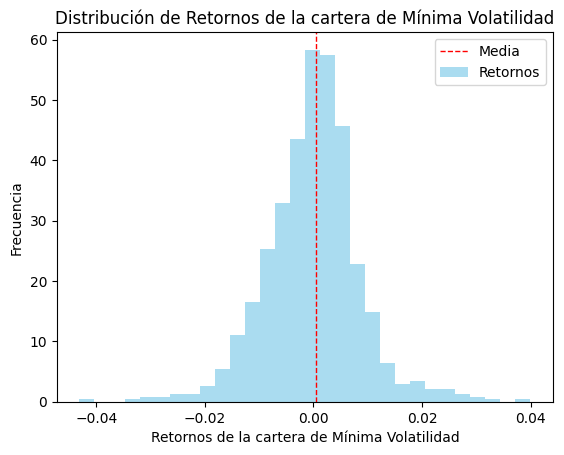

In [ ]:
# Representación gráfica de la asimetría de la cartera
plt.hist(retornos_volatilidad_finales, bins=30, density=True, color='skyblue', alpha=0.7)
mean = np.mean(retornos)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1)
plt.xlabel('Retornos de la cartera de Mínima Volatilidad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Retornos de la cartera de Mínima Volatilidad')
plt.legend(['Media', 'Retornos'])
plt.show()


In [ ]:
# Calcular la rentabilidad media de la cartera (diaria y anual)
rentabilidad_media_volatilidad_diaria = retornos_volatilidad_finales.mean()
print(f'Su rentabilidad media diaria es {(rentabilidad_media_volatilidad_diaria * 100):.2f}%')

rentabilidad_media_volatilidad_anual = rentabilidad_media_volatilidad_diaria * 252
print(f'Su rentabilidad media anual es {(rentabilidad_media_volatilidad_anual * 100):.2f}%')

Su rentabilidad media diaria es -0.01%
Su rentabilidad media anual es -2.70%


In [ ]:
# Calcular la volatilidad de la cartera (diaria y anual)
volatilidad_volatilidad_diaria = np.std(retornos_volatilidad_finales)
print(f'Su volatilidad diaria es {volatilidad_volatilidad_diaria :.2f}')

volatilidad_volatilidad_anual = volatilidad_volatilidad_diaria * np.sqrt(252)
print(f'Su volatilidad anual es {volatilidad_volatilidad_anual:.2f}')

Su volatilidad diaria es 0.01
Su volatilidad anual es 0.14


In [ ]:
# Cálculo del Ratio de Sharpe de la cartera (diario y anual)
ratio_sharpe_volatilidad_diario = (rentabilidad_media_volatilidad_diaria) / volatilidad_volatilidad_diaria
print(f'Ratio de Sharpe: {ratio_sharpe_volatilidad_diario:.2f}')

ratio_sharpe_volatilidad_anual = (rentabilidad_media_volatilidad_anual) / volatilidad_volatilidad_anual
print(f'Ratio de Sharpe: {ratio_sharpe_volatilidad_anual:.2f}')

Ratio de Sharpe: -0.01
Ratio de Sharpe: -0.20


In [ ]:
# Cálculo del CVaR al 95% de la cartera
cvar_95 = np.percentile(retornos_volatilidad_finales, 5)
print("CVaR al 95%:", cvar_95)

CVaR al 95%: -0.013831919269522534


**`3º paso:`** Análisis de la cartera de Mínimo CVaR








In [ ]:
# DEFINICIÓN DE LA CARTERA DE MÍNIMO CVAR
def cartera_min_cvar(ret, alpha=0.5):

    ''' Función que calcula la cartera de mínimo CVaR para un DataFrame de rendimientos
    ret: DataFrame de rendimientos
    alpha: Nivel de confianza
    Retorna pesos_ajustados: Array con los pesos de la cartera de mínimo CVaR'''

    if isinstance(ret, pd.DataFrame): # Verifico que el argumento sea un DataFrame
        retornos = ret.to_numpy()
        retornos_esperados = ret.mean().to_numpy()

        num_data, num_act = retornos.shape # Número de datos y número de activos

        pesos = cp.Variable(num_act)
        t = cp.Variable()  #VaR
        ui = cp.Variable(num_data) #Exceso de pérdida con respecto al VaR

        riesgo = t + cp.sum(ui)/(alpha * num_data)  #CVaR
        retornos_cartera = retornos_esperados.T @ pesos

        restricciones = [
            -retornos @ pesos - t - ui <= 0,  # Las pérdidas son menores que VaR más el exceso de pérdida
            ui >= 0,  # Los excesos son positivos
            cp.sum(pesos) == 1,
            pesos >= 0,  # No se pueden tener posiciones cortas
        ]

        objective = cp.Minimize(riesgo)

        # Solve the problem
        prob = cp.Problem(objective, restricciones)
        cvar95_min_cvar = prob.solve()

        pesos_ajustados = np.array([np.round(x, 3) if x > 10**-4 else 0  for x in pesos.value]) #Pongo a cero los pesos menores a 10^-4 y redondeo a 3 decimales

        return pesos_ajustados

    else:
        raise ValueError('La función cartera_min_cvar solo acepta un DataFrame como argumento')


In [ ]:
# Filtrar los retornos para los años 2019 y 2020
retornos_2019_2020 = retornos.loc['2019':'2020']

# Calcular los pesos para los años 2019 y 2020
pesos_cvar_2019_2020 = cartera_min_cvar(retornos_2019_2020)

# Filtrar los datos restantes (desde 2021 hasta ahora)
retornos_restantes = retornos.loc['2021':]

# Calcular los retornos finales
retornos_cvar_finales = retornos_restantes @ pesos_cvar_2019_2020

In [ ]:
# Cálculo de la kurtosis y asimetría de la cartera
print(f' Su asimetria es {retornos_cvar_finales.skew():.2f}')
print(f' Su kurtosis es {retornos_cvar_finales.kurtosis():.2f}')

 Su asimetria es -0.21
 Su kurtosis es 1.73


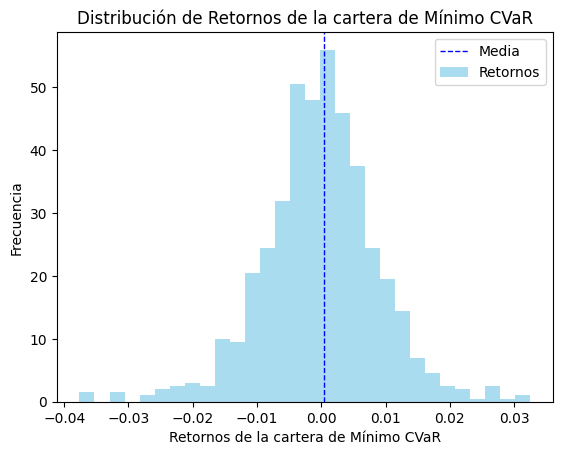

In [ ]:
# Representación gráfica de la asimetría de la cartera
plt.hist(retornos_cvar_finales, bins=30, density=True, color='skyblue', alpha=0.7)
mean = np.mean(retornos)
plt.axvline(mean, color='blue', linestyle='dashed', linewidth=1)
plt.xlabel('Retornos de la cartera de Mínimo CVaR')
plt.ylabel('Frecuencia')
plt.title('Distribución de Retornos de la cartera de Mínimo CVaR')
plt.legend(['Media', 'Retornos'])
plt.show()

In [ ]:
# Cálculo de la rentabilidad media de la cartera (diaria y anual)
rentabilidad_media_cvar_diaria = retornos_cvar_finales.mean()
print(f'Su rentabilidad media diaria es {(rentabilidad_media_cvar_diaria * 100):.2f}%')

rentabilidad_media_cvar_anual = rentabilidad_media_cvar_diaria * 252
print(f'Su rentabilidad media anual es {(rentabilidad_media_cvar_anual * 100):.2f}%')

Su rentabilidad media diaria es -0.02%
Su rentabilidad media anual es -5.72%


In [ ]:
# Cálculo de la volatilidad de la cartera (diaria y anual)
volatilidad_cvar_diaria = np.std(retornos_cvar_finales)
print(f'Su volatilidad diaria es {volatilidad_cvar_diaria :.2f}')

volatilidad_cvar_anual = volatilidad_cvar_diaria * np.sqrt(252)
print(f'Su volatilidad anual es {volatilidad_cvar_anual:.2f}')

Su volatilidad diaria es 0.01
Su volatilidad anual es 0.14


In [ ]:
# Cálculo del Ratio de Sharpe de la cartera (diario y anual)
ratio_sharpe_cvar_diario = (rentabilidad_media_cvar_diaria) / volatilidad_cvar_diaria
print(f'Ratio de Sharpe: {ratio_sharpe_cvar_diario:.2f}')

ratio_sharpe_cvar_anual = (rentabilidad_media_cvar_anual) / volatilidad_cvar_anual
print(f'Ratio de Sharpe: {ratio_sharpe_cvar_anual:.2f}')

Ratio de Sharpe: -0.03
Ratio de Sharpe: -0.40


In [ ]:
# Cálculo del CVaR al 95% de la cartera
cvar_95 = np.percentile(retornos_cvar_finales, 5)
print("CVaR al 95%:", cvar_95)

CVaR al 95%: -0.015094392715283195


**`4º PASO:`** Representación gráfica conjunta de los retornos

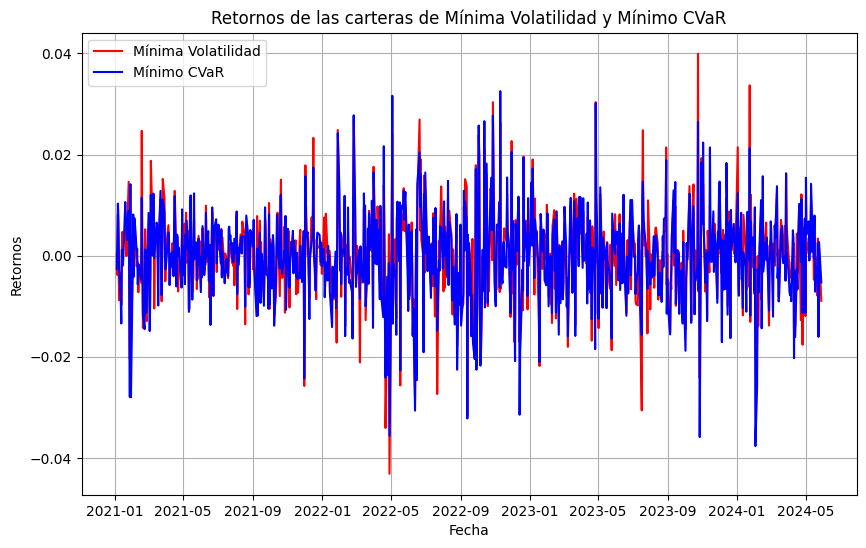

In [ ]:
# Representación gráfica de los retornos de ambas carteras
plt.figure(figsize=(10, 6))
plt.plot(retornos_volatilidad_finales.index, retornos_volatilidad_finales, label='Mínima Volatilidad', color='red')
plt.plot(retornos_cvar_finales.index, retornos_cvar_finales, label='Mínimo CVaR', color='blue')
plt.xlabel('Fecha')
plt.ylabel('Retornos')
plt.title('Retornos de las carteras de Mínima Volatilidad y Mínimo CVaR')
plt.legend()
plt.grid(True)
plt.show()


**`5º PASO:`** Representación gráfica conjunta de la suma acumulada de los retornos de ambas carteras




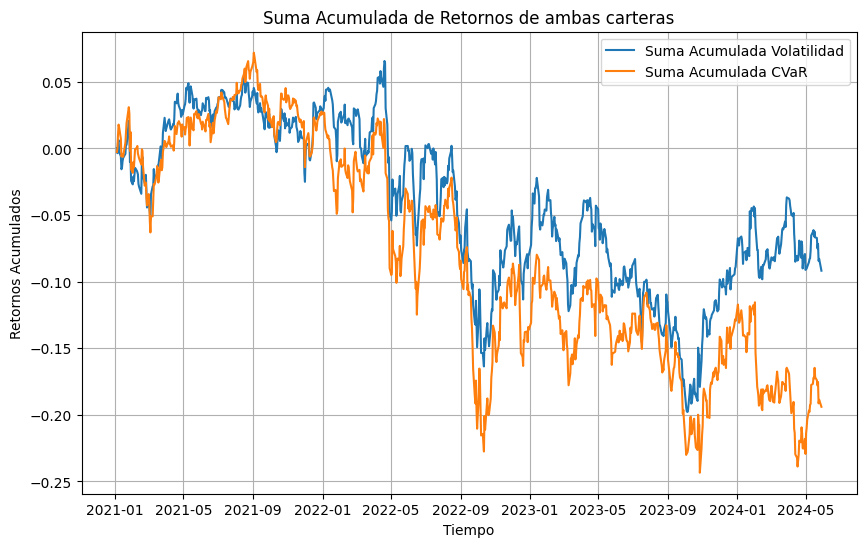

In [ ]:
# Representación gráfica de la suma acumulada de los retornos de ambas carteras
# Calcula la suma acumulada
cumsum_volatilidad = retornos_volatilidad_finales.cumsum()
cumsum_cvar = retornos_cvar_finales.cumsum()

# Crea la gráfica
plt.figure(figsize=(10, 6))

plt.plot(cumsum_volatilidad, label='Suma Acumulada Volatilidad')
plt.plot(cumsum_cvar, label='Suma Acumulada CVaR')

plt.title('Suma Acumulada de Retornos de ambas carteras')
plt.xlabel('Tiempo')
plt.ylabel('Retornos Acumulados')
plt.legend()
plt.grid(True)

# Muestra la gráfica
plt.show()


**`6º PASO:`** Distribución de los activos de cada una de las carteras

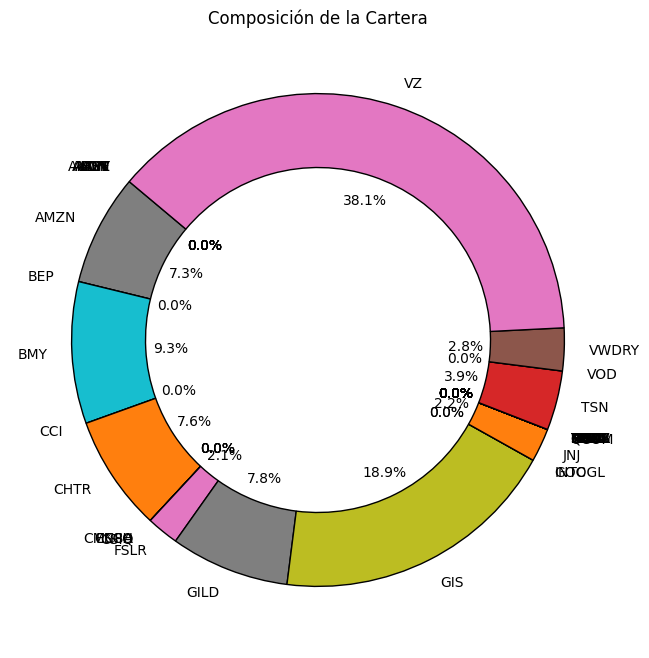

In [ ]:
# Distribución de los activos de la cartera de Mínima Volatilidad
plt.figure(figsize=(8, 8))

# Obtener los activos filtrados y sus pesos
activos_filtrados = retornos.columns.tolist()
pesos_filtrados = pesos_volatilidad_2019_2020

plt.pie(pesos_filtrados, labels=activos_filtrados, autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.3, 'edgecolor': 'black'})

plt.title('Composición de la Cartera')
plt.show()

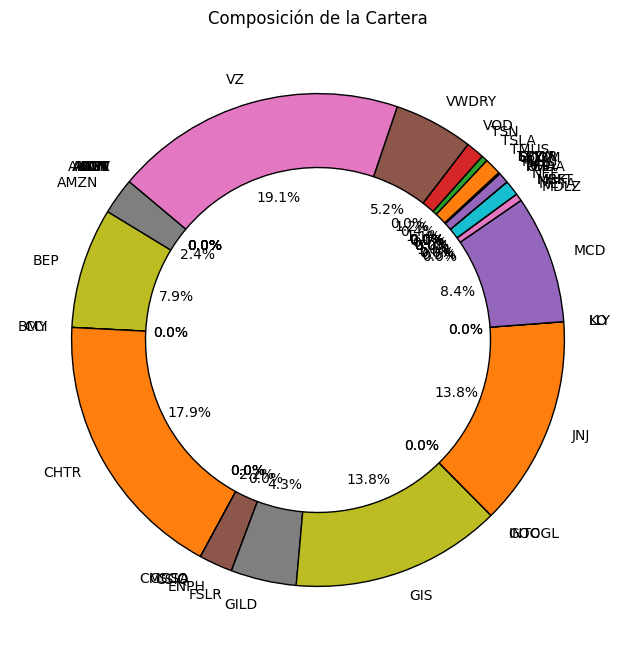

In [ ]:
# Distribución de los activos de la cartera de Mínimo CVaR
plt.figure(figsize=(8, 8))

# Obtener los activos filtrados y sus pesos
activos_filtrados = retornos.columns.tolist()
pesos_filtrados = pesos_cvar_2019_2020

plt.pie(pesos_filtrados, labels=activos_filtrados, autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.3, 'edgecolor': 'black'})

# Añadir título
plt.title('Composición de la Cartera')

# Mostrar el gráfico
plt.show()
